# Plotting intermidiate network results

In [120]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  c:\Users\Lenovo\Desktop\pypsa-earth
Had to go 0 folder(s) up.


In [121]:
# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load all networks (without m command in clusterization)

In [122]:
#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

clustered_network = os.getcwd() + '/networks/elec_s_4.nc'
n_cluster = pypsa.Network(clustered_network)

solved_network = os.getcwd() + "/results/networks/elec_s_4_ec_lcopt_Co2L-1H.nc"
n_solve = pypsa.Network(solved_network)

base_network= os.getcwd() +  "/networks/base.nc"
n_base= pypsa.Network(base_network)



INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


# Load all networks (with m command in clusterization)

In [123]:
#Se carga el documento (o la direccion/path del mismo) a una variable (solved_network)

mclustered_network = os.getcwd() + '/networks/elec_s_4m.nc'
mn_cluster = pypsa.Network(mclustered_network)

msolved_network = os.getcwd() + "/results/networks/elec_s_4m_ec_lcopt_Co2L-1H.nc"
mn_solve = pypsa.Network(msolved_network)

mbase_network= os.getcwd() +  "/networks/base.nc"
mn_base= pypsa.Network(mbase_network)

INFO:pypsa.io:Imported network elec_s_4m.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_4m_ec_lcopt_Co2L-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


# Base network

In [124]:
n_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 322
 - Transformer: 39
Snapshots: 8760

In [125]:
mn_base

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 155
 - Line: 322
 - Transformer: 39
Snapshots: 8760

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


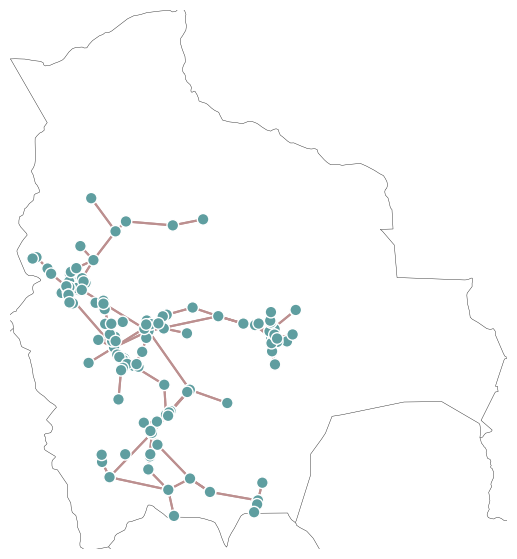

In [126]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#countries = ["Bolivia"]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


# Solved network

In [127]:
n = n_solve
n

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 24
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 8760

In [128]:
mn = mn_solve
mn

PyPSA Network
Components:
 - Bus: 12
 - Carrier: 16
 - Generator: 148
 - GlobalConstraint: 1
 - Line: 3
 - Link: 16
 - Load: 4
 - StorageUnit: 3
 - Store: 8
Snapshots: 8760

c:\Users\Lenovo\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


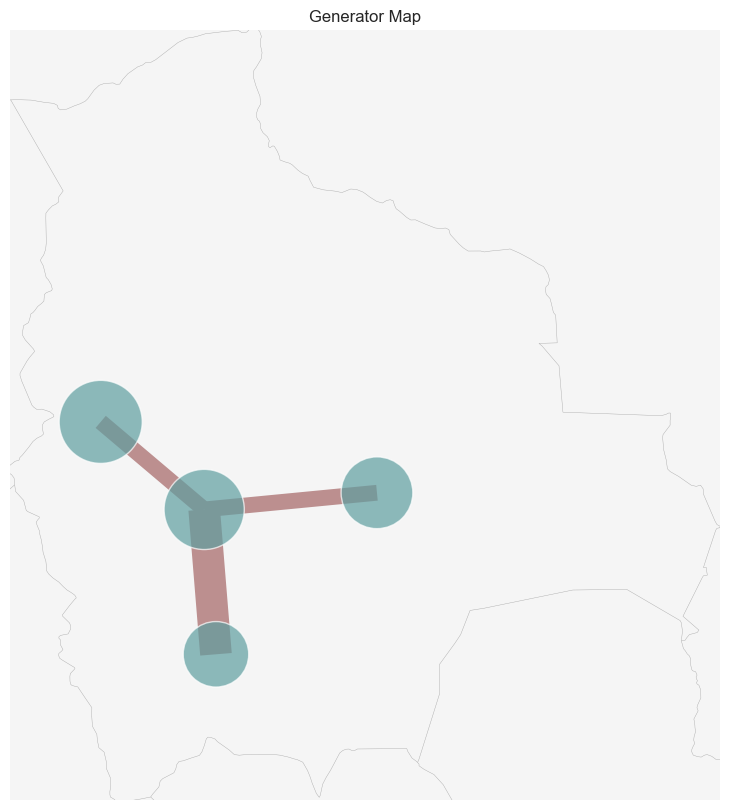

In [129]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={
        "projection": ccrs.PlateCarree()
    },  # PlateCarree(default), Mercator, Orthographic
)

# loading = (n3.lines_t.p0.abs().mean().sort_index() / (n3.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

n.plot(
    margin=0.1,
    ax=ax,
    geomap=True,  #'10m' leads to a beautiful high resolution map
    projection=None,
    bus_colors="cadetblue",
    bus_alpha=0.7,
    bus_sizes=normalize_node_size(
        n.loads_t.p_set.sum().rename("load").rename_axis("bus")
    )*0.5,  # n.loads_t.p_set.sum().rename("load").rename_axis("bus")*.0000003,
    bus_cmap=None,
    line_colors="rosybrown",
    link_colors="darkseagreen",  # loading
    transformer_colors="orange",
    line_widths=n.lines.s_nom_opt / 1e2,
    link_widths=1.5,
    transformer_widths=1.5,
    line_cmap=None,
    link_cmap=None,  # plt.cm.virdis (colordmap for line loading)
    transformer_cmap=None,
    flow=None,
    branch_components=None,
    layouter=None,
    title="Generator Map",
    boundaries=None,
    geometry=False,
    jitter=None,
    color_geomap=True,
)  # None or True

ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [130]:
##### check why the value does not appear 
#   - It seems that while the model run before, due to restrictions on simulation, proper solving wasn't possible (by increasing tolerances of the solver the model gets actual results)
# Eur/Year

n.objective

112286728.55025029

In [131]:
mn.objective

-36506466.99937467

In [132]:
n.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-66.283933,-17.925590,Slack,BO 0 OCGT,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.342114,-17.641621,PQ,,AC,,None,1.0,0.0,inf,
BO 2,220.0,BO,-66.083350,-20.392008,PQ,,AC,,None,1.0,0.0,inf,
BO 3,220.0,BO,-68.045925,-16.434406,PQ,,AC,,None,1.0,0.0,inf,
BO 0 H2,1.0,BO,-66.283933,-17.925590,Slack,,H2,,None,1.0,0.0,inf,
BO 1 H2,1.0,BO,-63.342114,-17.641621,Slack,,H2,,None,1.0,0.0,inf,
BO 2 H2,1.0,BO,-66.083350,-20.392008,Slack,,H2,,None,1.0,0.0,inf,
BO 3 H2,1.0,BO,-68.045925,-16.434406,Slack,,H2,,None,1.0,0.0,inf,
BO 0 battery,1.0,BO,-66.283933,-17.925590,Slack,,battery,,None,1.0,0.0,inf,


In [133]:
mn.buses

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-66.283933,-17.925590,PV,123 onwind,AC,,None,1.0,0.0,inf,
BO 1,220.0,BO,-63.342114,-17.641621,PV,41 onwind,AC,,None,1.0,0.0,inf,
BO 2,220.0,BO,-66.083350,-20.392008,PV,115 onwind,AC,,None,1.0,0.0,inf,
BO 3,220.0,BO,-68.045925,-16.434406,Slack,0 onwind,AC,,None,1.0,0.0,inf,
BO 0 H2,1.0,BO,-66.283933,-17.925590,Slack,,H2,,None,1.0,0.0,inf,
BO 1 H2,1.0,BO,-63.342114,-17.641621,Slack,,H2,,None,1.0,0.0,inf,
BO 2 H2,1.0,BO,-66.083350,-20.392008,Slack,,H2,,None,1.0,0.0,inf,
BO 3 H2,1.0,BO,-68.045925,-16.434406,Slack,,H2,,None,1.0,0.0,inf,
BO 0 battery,1.0,BO,-66.283933,-17.925590,Slack,,battery,,None,1.0,0.0,inf,


In [134]:
generadores = n.generators
generadores_hora = n.generators_t.p_max_pu
generadores_pmax = n.generators.p_nom_max

In [135]:
generadoresm = mn.generators
generadoresm_hora = mn.generators_t.p_max_pu
generadoresm_pmax = mn.generators.p_nom_max

In [136]:
gen_cap = n.generators.groupby(["carrier"]).sum()
gen_cap

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28472\2958603594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_cap = n.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.236000e+02,168938.245618,1.000,123.6,25.780434,0,1.236000e+02,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
OCGT,NaN,0.000000,0.000000e+00,141703.684213,1.170,0.0,43.183196,0,0.000000e+00,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
biomass,NaN,0.000000,9.900000e+01,556030.719012,0.936,99.0,29.934495,2,9.908000e+01,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
geothermal,inf,0.000000,5.500000e+01,334431.013779,0.239,55.0,0.009572,1,3.899580e+02,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
load,NaN,0.000000,4.000000e+09,0.000000,4.000,0.0,4.040597,0,4.000000e+09,0.004,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
oil,inf,0.000000,0.000000e+00,38234.561404,0.393,0.0,130.236490,0,0.000000e+00,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375877e+06,160337.837381,4.500000e+01,437182.277006,4.000,45.0,0.098765,4,4.509236e+01,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
ror,NaN,611.770000,6.117700e+02,812822.145848,2.700,0.0,0.031157,0,6.117700e+02,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
solar,1.869811e+06,330825.879637,1.004000e+02,203423.833068,4.000,100.4,0.079582,4,5.236000e+02,4.000,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0


In [137]:
mgen_cap = mn.generators.groupby(["carrier"]).sum()
mgen_cap

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28472\3547310800.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mgen_cap = mn.generators.groupby(["carrier"]).sum()


,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,p_nom_extendable,p_nom_opt,sign,build_year,min_up_time,min_down_time,up_time_before,down_time_before,p_min_pu,p_max_pu,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCGT,NaN,0.000000,1.236000e+02,1.689382e+05,1.000,123.6,25.779798,0,1.236000e+02,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
OCGT,NaN,0.000000,0.000000e+00,1.417037e+05,1.170,0.0,43.182212,0,0.000000e+00,3.000,0,0,0,3,0,0.0,3.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,3.0,3.0
biomass,NaN,0.000000,9.900000e+01,5.560307e+05,0.936,99.0,29.934215,2,9.900000e+01,2.000,0,0,0,2,0,0.0,2.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,2.0,2.0
geothermal,inf,0.000000,5.500000e+01,3.344310e+05,0.239,55.0,0.010602,1,5.500000e+01,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
load,NaN,0.000000,4.000000e+09,0.000000e+00,4.000,0.0,4.040263,0,4.000000e+09,0.004,0,0,0,4,0,0.0,4.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,4.0,4.0
oil,inf,0.000000,0.000000e+00,3.823456e+04,0.393,0.0,130.236550,0,0.000000e+00,1.000,0,0,0,1,0,0.0,1.0,0.0,0.0,inf,0,0.0,0.0,0.0,0.0,1.0,1.0
onwind,2.375877e+06,160337.837381,4.500000e+01,6.885621e+06,63.000,45.0,1.577334,63,4.500045e+01,63.000,0,0,0,63,0,0.0,63.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,63.0,63.0
ror,NaN,611.770000,6.117700e+02,2.438466e+06,8.100,0.0,0.087732,0,6.117700e+02,9.000,0,0,0,9,0,0.0,9.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,9.0,9.0
solar,1.869811e+06,330825.879637,1.004000e+02,3.203925e+06,63.000,100.4,1.258384,63,2.435177e+02,63.000,0,0,0,63,0,0.0,63.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,63.0,63.0


<AxesSubplot:xlabel='snapshot'>

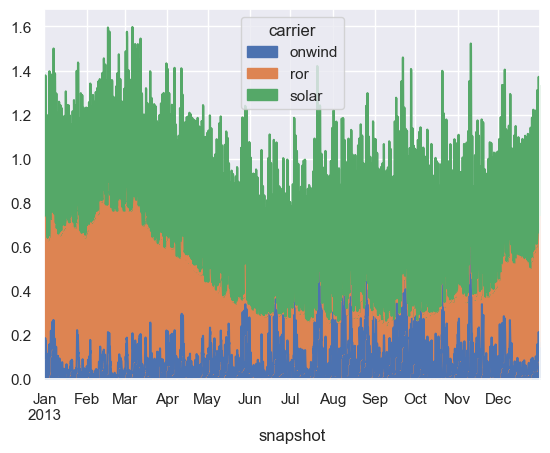

In [138]:
############### Without m in the cluster wildcard ################
n.generators_t.p_max_pu.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).mean().plot(kind = "area")

In [139]:
############### With m in the cluster wildcard ################
mn.generators_t.p_max_pu.loc["2013-01-01":"2014-01-01"].groupby(mn.generators.carrier, axis=1).mean().plot(kind = "area")

TypeError: no numeric data to plot

<AxesSubplot:xlabel='snapshot'>

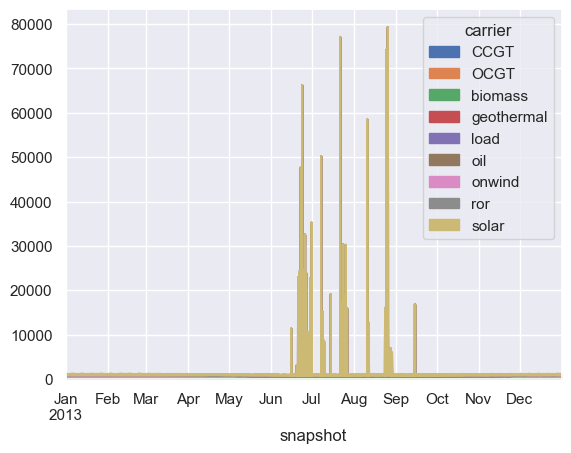

In [140]:
################ Without the m command in the cluster wildcard ####################
n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().plot(kind = "area")

<AxesSubplot:xlabel='snapshot'>

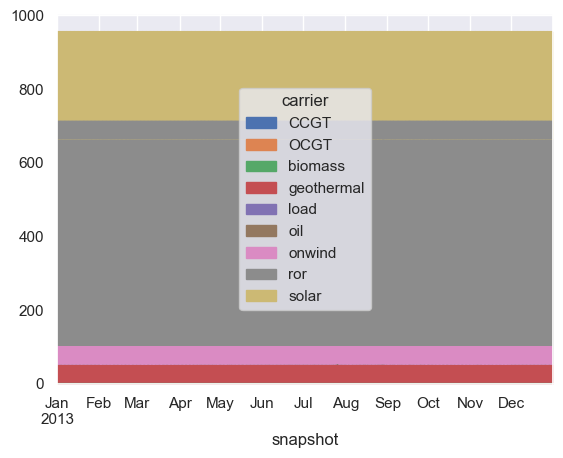

In [141]:
################ With the m command in the cluster wildcard ####################
mn.generators_t.p.groupby(mn.generators.carrier, axis=1).sum().plot(kind = "area")

In [142]:
load_shedding = n.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(n.generators.carrier, axis=1).sum()["load"]
load_shedding.sum()

1560521.122723128

In [143]:
load_shedding = mn.generators_t.p.loc["2013-01-01":"2014-01-01"].groupby(mn.generators.carrier, axis=1).sum()["load"]
load_shedding.sum()

0.9319030712135807

In [ ]:
n.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                6.165563e-01         2.754576e+07   
            Combined-Cycle Gas     8.175107e-01         1.044038e+07   
            Geothermal             9.959415e-01         1.304141e+08   
            Oil                             NaN         0.000000e+00   
            Onshore Wind           1.417618e-01         4.928395e+06   
            Open-Cycle Gas                  NaN         0.000000e+00   
            Run of River           4.319740e-01         1.657534e+08   
            Solar                  1.987337e-01         2.662818e+07   
            load                   4.453542e-08         0.000000e+00   
Line        AC                     1.290711e-01         6.034913e+07   
Link        H2 electrolysis        2.638503e-01         2.010737e+05   
            H2 fuel cell           2.388757e-02         8.906061e+05   
            battery charger        1.716833e-01         1.400673e+05   
            battery discharger     1.390636e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        2.322236e-01         8.823570e+07   
Store       Battery Storage        4.815966e-01         1.281842e+05   
            Hydrogen Storage       4.537820e-01         1.588899e+05   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                0.000000        9.900000e+01   
            Combined-Cycle Gas     0.000000        1.236000e+02   
            Geothermal             0.000000        5.500000e+01   
            Oil                    0.000000        0.000000e+00   
            Onshore Wind           0.383389        4.500000e+01   
            Open-Cycle Gas         0.000000        0.000000e+00   
            Run of River           3.679554        6.117700e+02   
            Solar                  2.529820        1.004000e+02   
            load                   0.000000        4.000000e+09   
Line        AC                          NaN        7.864896e+03   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        5.493200e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        9.143824e+02      9.908000e+01   
            Combined-Cycle Gas             1.302465e+03      1.236000e+02   
            Geothermal                     3.717485e+00      3.899580e+02   
            Oil                            0.000000e+00      0.000000e+00   
            Onshore Wind                   1.642265e-01      4.509236e+01   
            Open-Cycle Gas                 0.000000e+00      0.000000e+00   
            Run of River                   2.707555e+00      6.117700e+02   
            Solar                          2.099571e+00      5.236000e+02   
            load                           1.798346e+02      4.000000e+09   
Line        AC                                      NaN      4.553441e+03   
Link        H2 electrolysis                0.000000e+00      4.120835e+00   
            H2 fuel cell                   0.000000e+00      3.641349e+01   
            battery charger                0.000000e+00      3.637383e+00   
            battery discharger             0.000000e+00      4.041537e+00   
Load        -     

In [ ]:
mn.statistics()

Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Biomass                8.198993e-06         2.147113e+07   
            Combined-Cycle Gas     1.493245e-06         8.692295e+07   
            Oil                    1.514080e-06         4.488738e+05   
            Onshore Wind           9.981750e-01         2.905888e+06   
            Open-Cycle Gas         1.689452e-06         5.856283e+07   
            Solar                  9.980746e-01         3.988376e+07   
            load                   2.000267e-12         0.000000e+00   
Line        AC                     8.364685e-02         6.036734e+07   
Link        H2 electrolysis        4.977312e-01         1.589059e+02   
            H2 fuel cell           3.088477e-01         1.026913e+02   
            battery charger        4.581956e-01         2.556472e+02   
            battery discharger     3.711384e-01         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam        3.318584e-01         1.176112e+08   
Store       Battery Storage        5.017365e-01         1.578865e+02   
            Hydrogen Storage       5.000005e-01         1.440372e+02   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Biomass                     0.0        7.723000e+01   
            Combined-Cycle Gas          0.0        1.029050e+03   
            Oil                         0.0        1.174000e+01   
            Onshore Wind                0.0        2.654000e+01   
            Open-Cycle Gas              0.0        1.239830e+03   
            Solar                       0.0        1.090100e+02   
            load                        0.0        4.000000e+09   
Line        AC                          NaN        7.864896e+03   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam             0.0        7.322000e+02   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Biomass                        9.477681e-03      7.723003e+01   
            Combined-Cycle Gas             1.980739e-02      1.029050e+03   
            Oil                            2.314977e-03      1.174000e+01   
            Onshore Wind                   6.575217e-01      2.658743e+01   
            Open-Cycle Gas                 3.015119e-02      1.239830e+03   
            Solar                          1.505739e+01      7.842495e+02   
            load                           8.082798e-03      4.000000e+09   
Line        AC                                      NaN      4.553362e+03   
Link        H2 electrolysis                0.000000e+00      3.256642e-03   
            H2 fuel cell                   0.000000e+00      4.198657e-03   
            battery charger                0.000000e+00      6.638856e-03   
            battery discharger             0.000000e+00      7.376506e-03   
Load        -                                       NaN               NaN   
StorageUnit Reservoir & Dam                2.378777e+00      7.322000e+02   
Store       Battery Storage               -8.218927e-24      9.943797e-03   
            Hydrogen Storage               6.381755e-24      1.808868e-01   

                                    Revenue      Supply   Withdrawal  
            carrier                                                   